## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  10.892105  1405.603246  0.135936  5.638313  191.419434
1  23.012582   411.799753  0.153152  4.599650   67.051089
2  17.963227  1152.482969  0.186832  6.673121  216.094279
3  15.055427  1237.597341  0.177549  7.915955  220.154703
4  60.316121  1734.651497  0.531877  8.101341  924.703048


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0038522	total: 57.3ms	remaining: 57.2s
1:	learn: 0.9920540	total: 57.7ms	remaining: 28.8s
2:	learn: 0.9793843	total: 58.2ms	remaining: 19.3s
3:	learn: 0.9663809	total: 58.7ms	remaining: 14.6s
4:	learn: 0.9536218	total: 59.2ms	remaining: 11.8s
5:	learn: 0.9433802	total: 59.6ms	remaining: 9.87s
6:	learn: 0.9315113	total: 60ms	remaining: 8.51s
7:	learn: 0.9191006	total: 60.5ms	remaining: 7.5s
8:	learn: 0.9073282	total: 60.9ms	remaining: 6.71s
9:	learn: 0.8942250	total: 61.4ms	remaining: 6.08s
10:	learn: 0.8833059	total: 61.9ms	remaining: 5.57s
11:	learn: 0.8697486	total: 62.4ms	remaining: 5.14s
12:	learn: 0.8572636	total: 62.8ms	remaining: 4.77s
13:	learn: 0.8450656	total: 63.3ms	remaining: 4.46s
14:	learn: 0.8341397	total: 63.8ms	remaining: 4.19s
15:	learn: 0.8244861	total: 64.2ms	remaining: 3.95s
16:	learn: 0.8114925	total: 64.6ms	remaining: 3.73s
17:	learn: 0.8039844	total: 65ms	remaining: 3.54s
18:	learn: 0.7937377	total: 65.4ms	remaining: 3.3

114:	learn: 0.2754757	total: 106ms	remaining: 818ms
115:	learn: 0.2731452	total: 107ms	remaining: 815ms
116:	learn: 0.2706124	total: 107ms	remaining: 811ms
117:	learn: 0.2680764	total: 108ms	remaining: 807ms
118:	learn: 0.2659678	total: 108ms	remaining: 802ms
119:	learn: 0.2631038	total: 109ms	remaining: 797ms
120:	learn: 0.2609275	total: 109ms	remaining: 793ms
121:	learn: 0.2586404	total: 109ms	remaining: 788ms
122:	learn: 0.2559192	total: 110ms	remaining: 784ms
123:	learn: 0.2536977	total: 110ms	remaining: 779ms
124:	learn: 0.2516404	total: 111ms	remaining: 775ms
125:	learn: 0.2489838	total: 111ms	remaining: 770ms
126:	learn: 0.2469807	total: 111ms	remaining: 766ms
127:	learn: 0.2449923	total: 112ms	remaining: 761ms
128:	learn: 0.2424804	total: 112ms	remaining: 756ms
129:	learn: 0.2404658	total: 112ms	remaining: 751ms
130:	learn: 0.2379494	total: 113ms	remaining: 748ms
131:	learn: 0.2362210	total: 113ms	remaining: 745ms
132:	learn: 0.2344865	total: 114ms	remaining: 742ms
133:	learn: 

299:	learn: 0.0718675	total: 185ms	remaining: 432ms
300:	learn: 0.0714443	total: 186ms	remaining: 431ms
301:	learn: 0.0710669	total: 186ms	remaining: 430ms
302:	learn: 0.0706495	total: 187ms	remaining: 429ms
303:	learn: 0.0702198	total: 187ms	remaining: 428ms
304:	learn: 0.0698113	total: 187ms	remaining: 427ms
305:	learn: 0.0694068	total: 188ms	remaining: 426ms
306:	learn: 0.0690804	total: 188ms	remaining: 425ms
307:	learn: 0.0687349	total: 189ms	remaining: 424ms
308:	learn: 0.0682404	total: 189ms	remaining: 423ms
309:	learn: 0.0679044	total: 190ms	remaining: 422ms
310:	learn: 0.0675046	total: 190ms	remaining: 421ms
311:	learn: 0.0671375	total: 190ms	remaining: 420ms
312:	learn: 0.0668972	total: 191ms	remaining: 419ms
313:	learn: 0.0665715	total: 191ms	remaining: 418ms
314:	learn: 0.0663023	total: 192ms	remaining: 417ms
315:	learn: 0.0658975	total: 192ms	remaining: 416ms
316:	learn: 0.0655614	total: 193ms	remaining: 415ms
317:	learn: 0.0652085	total: 193ms	remaining: 414ms
318:	learn: 

530:	learn: 0.0245452	total: 289ms	remaining: 255ms
531:	learn: 0.0244072	total: 289ms	remaining: 254ms
532:	learn: 0.0242648	total: 289ms	remaining: 254ms
533:	learn: 0.0242188	total: 290ms	remaining: 253ms
534:	learn: 0.0240858	total: 290ms	remaining: 252ms
535:	learn: 0.0239414	total: 291ms	remaining: 252ms
536:	learn: 0.0238048	total: 291ms	remaining: 251ms
537:	learn: 0.0237247	total: 292ms	remaining: 250ms
538:	learn: 0.0236461	total: 292ms	remaining: 250ms
539:	learn: 0.0235687	total: 292ms	remaining: 249ms
540:	learn: 0.0234459	total: 293ms	remaining: 248ms
541:	learn: 0.0233051	total: 293ms	remaining: 248ms
542:	learn: 0.0232293	total: 293ms	remaining: 247ms
543:	learn: 0.0230920	total: 294ms	remaining: 246ms
544:	learn: 0.0230178	total: 294ms	remaining: 246ms
545:	learn: 0.0229449	total: 294ms	remaining: 245ms
546:	learn: 0.0228268	total: 295ms	remaining: 244ms
547:	learn: 0.0227554	total: 295ms	remaining: 244ms
548:	learn: 0.0226392	total: 296ms	remaining: 243ms
549:	learn: 

722:	learn: 0.0116958	total: 368ms	remaining: 141ms
723:	learn: 0.0116837	total: 368ms	remaining: 140ms
724:	learn: 0.0116241	total: 369ms	remaining: 140ms
725:	learn: 0.0116121	total: 369ms	remaining: 139ms
726:	learn: 0.0116003	total: 370ms	remaining: 139ms
727:	learn: 0.0115498	total: 370ms	remaining: 138ms
728:	learn: 0.0115356	total: 371ms	remaining: 138ms
729:	learn: 0.0115241	total: 371ms	remaining: 137ms
730:	learn: 0.0114686	total: 372ms	remaining: 137ms
731:	learn: 0.0114547	total: 372ms	remaining: 136ms
732:	learn: 0.0114429	total: 372ms	remaining: 136ms
733:	learn: 0.0113943	total: 373ms	remaining: 135ms
734:	learn: 0.0113808	total: 373ms	remaining: 135ms
735:	learn: 0.0113673	total: 374ms	remaining: 134ms
736:	learn: 0.0113194	total: 374ms	remaining: 133ms
737:	learn: 0.0113001	total: 374ms	remaining: 133ms
738:	learn: 0.0112871	total: 375ms	remaining: 132ms
739:	learn: 0.0112742	total: 375ms	remaining: 132ms
740:	learn: 0.0112557	total: 376ms	remaining: 131ms
741:	learn: 

959:	learn: 0.0068074	total: 470ms	remaining: 19.6ms
960:	learn: 0.0068039	total: 471ms	remaining: 19.1ms
961:	learn: 0.0068004	total: 471ms	remaining: 18.6ms
962:	learn: 0.0067731	total: 472ms	remaining: 18.1ms
963:	learn: 0.0067697	total: 472ms	remaining: 17.6ms
964:	learn: 0.0067427	total: 473ms	remaining: 17.1ms
965:	learn: 0.0067237	total: 473ms	remaining: 16.6ms
966:	learn: 0.0067006	total: 473ms	remaining: 16.2ms
967:	learn: 0.0066742	total: 474ms	remaining: 15.7ms
968:	learn: 0.0066392	total: 474ms	remaining: 15.2ms
969:	learn: 0.0066107	total: 475ms	remaining: 14.7ms
970:	learn: 0.0065829	total: 475ms	remaining: 14.2ms
971:	learn: 0.0065544	total: 476ms	remaining: 13.7ms
972:	learn: 0.0065199	total: 476ms	remaining: 13.2ms
973:	learn: 0.0064923	total: 476ms	remaining: 12.7ms
974:	learn: 0.0064584	total: 477ms	remaining: 12.2ms
975:	learn: 0.0064267	total: 477ms	remaining: 11.7ms
976:	learn: 0.0063935	total: 478ms	remaining: 11.2ms
977:	learn: 0.0063704	total: 478ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

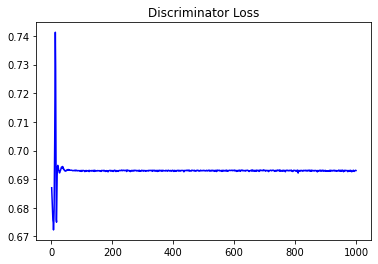

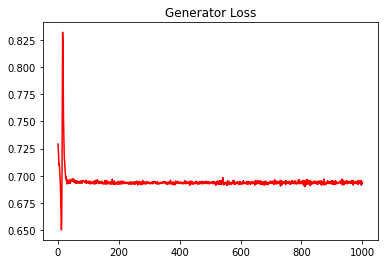

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.009525670590146279


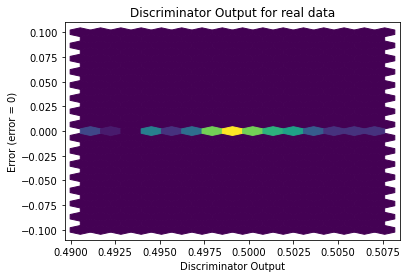

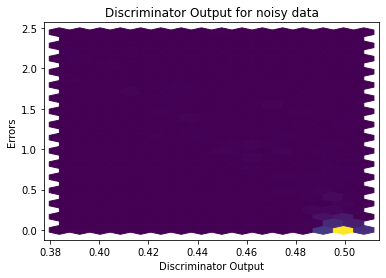

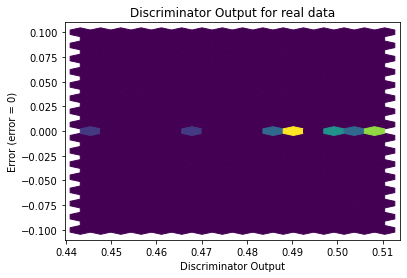

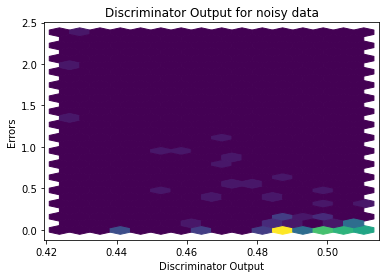

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


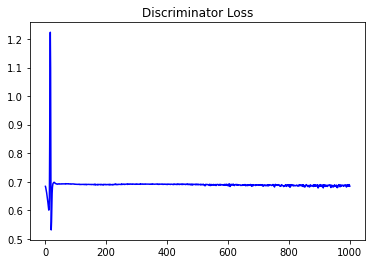

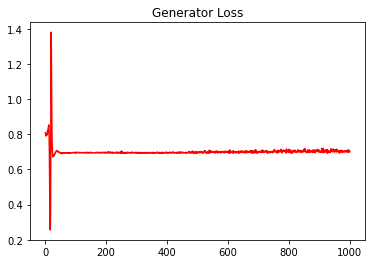

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.006462347905256171


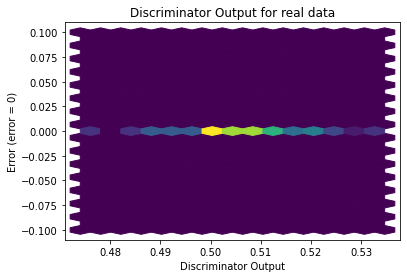

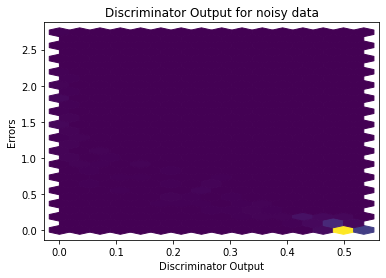

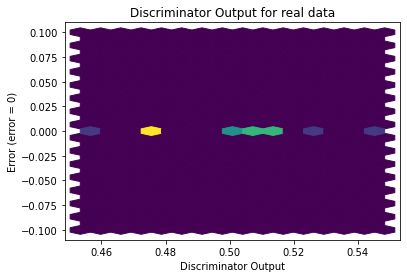

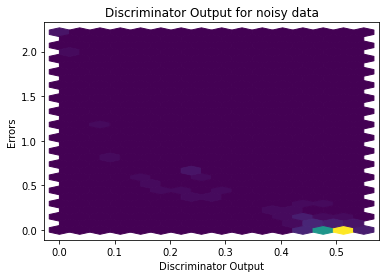

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0850]], requires_grad=True)
